# Model Creation - Decision Tree

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

### Loading the dataset

In [4]:
df=pd.read_csv("crop_df.csv")

# Model Building

## Data Preprocessing

### Separating features & target

In [5]:
features=df[["N","P","K","ph","temperature","humidity","rainfall"]]
target=df["label"]
labels=df["label"]

### Spliting Training and Testing Data

In [6]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=4)

### Using Decision Tree Classifier

In [7]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

# Model Evaluation

### Test Accuarcy - 90.7575%

In [8]:
predicted_values = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
x

0.9075757575757576

### Train Accuaracy 92.8571%

In [9]:
#Train Accuracy
DecisionTree.score(x_train,y_train)

0.9285714285714286

In [10]:
#Test Accuracy
DecisionTree.score(x_test,y_test)

0.9075757575757576

### Using the Classification Evaluation Metrics to evalaute the model

In [11]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        26
      banana       0.93      1.00      0.96        25
   blackgram       0.76      0.85      0.80        33
    chickpea       1.00      1.00      1.00        33
     coconut       1.00      1.00      1.00        32
      coffee       0.90      0.93      0.91        28
      cotton       0.93      1.00      0.97        28
      grapes       1.00      1.00      1.00        35
        jute       1.00      0.19      0.32        32
 kidneybeans       1.00      0.68      0.81        25
      lentil       0.94      1.00      0.97        33
       maize       0.89      0.57      0.69        30
       mango       1.00      0.94      0.97        34
   mothbeans       0.59      0.88      0.71        26
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        27
      papaya       1.00    

# Applaying Cross Validation

In [12]:
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.91136364, 0.92045455, 0.87272727, 0.93636364])

### Cross Val Accuracy 91.54%

In [13]:
score.mean()

np.float64(0.9154545454545454)

### PLotting the accuracy (Train,Test,CV)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
scores=[0.9285714285714286,0.9075757575757576,0.9154545454545454]
labels=["Train","Test","CV"]

(0.5, 1.0)

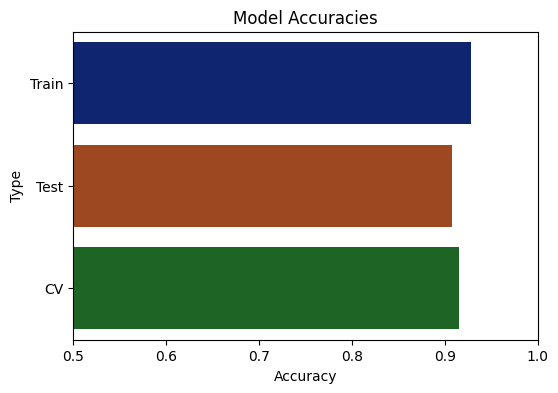

In [16]:
plt.figure(figsize=[6,4],dpi = 100)
plt.title('Model Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Type')
sns.barplot(x = scores,y = labels,palette="dark")
plt.xlim(0.5,1)

# Creating a function to use the model 

In [17]:
def predict_crop_label(input_features):
    
    
    input_features = np.array(input_features).reshape(1, -1) 
    
    # Predict the crop label using the LogReg model
    predicted_label = DecisionTree.predict(input_features)
    
    return predicted_label[0]  # Return the predicted label

# Example usage:
user_input = [83, 45, 60, 28, 70.3, 7.0, 150.9]  # Example input features (N, P, K, pH, temperature, humidity, rainfall)
predicted_crop_label = predict_crop_label(user_input)
print("Predicted Crop Label:", predicted_crop_label)

user_input = [104,18, 30, 23.603016, 60.3, 6.7, 140.91]  # Example input features (N, P, K, pH, temperature, humidity, rainfall)
predicted_crop_label = predict_crop_label(user_input)
print("Predicted Crop Label:", predicted_crop_label)

Predicted Crop Label: chickpea
Predicted Crop Label: coffee
